In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [8,5]

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
corr=df.corr(numeric_only=True)
corr

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'TV vs Sales')

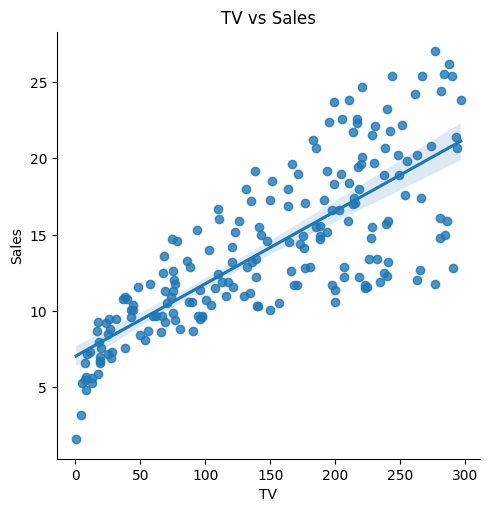

In [8]:
sns.lmplot(x='TV',y='Sales',data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

<Axes: >

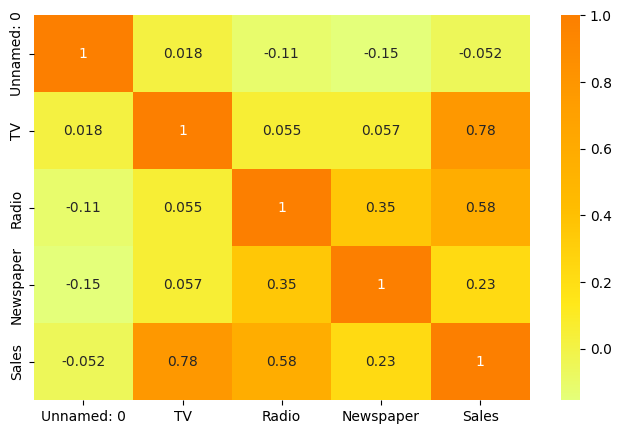

In [9]:
sns.heatmap(corr,cmap='Wistia',annot=True)

<Axes: xlabel='Sales', ylabel='Count'>

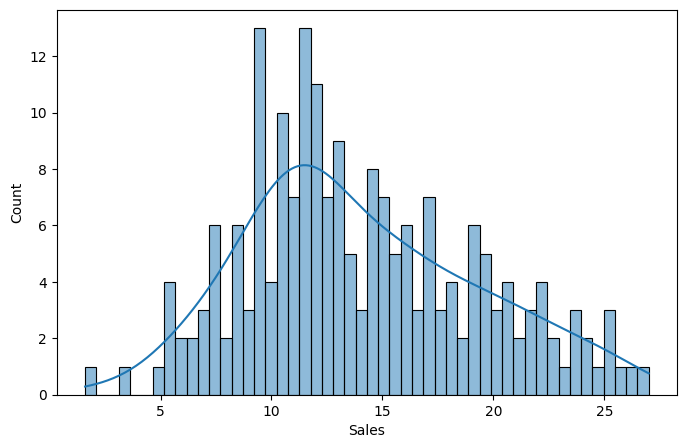

In [10]:
sns.histplot(df['Sales'],kde=True,bins=50,fill=True)

In [11]:
X = df.drop(['Sales'],axis=1)
y = df['Sales']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=23)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [14]:
lin_reg.intercept_

2.8913814909484366

In [15]:
lin_reg.coef_

array([0.00029627, 0.04649705, 0.18150904, 0.00019549])

In [16]:
y_pred=lin_reg.predict(X_test)
y_pred

array([10.15270115, 21.66470165, 18.76923062, 13.69316811, 18.36651254,
        6.73748046, 15.33371031, 14.08812168, 23.77322234, 13.90386337,
       20.66827128, 11.64911957,  8.8800096 , 14.81706789,  8.4202627 ,
       15.3052783 , 10.14416168,  8.08614553, 19.13342811,  9.43421408,
       24.70252041, 20.54571285, 17.22321596,  6.62681604,  8.25881682,
       23.31182834, 21.72065698, 15.50114639,  9.31828149, 10.10818625,
       15.79628795,  9.83911894, 13.50438339,  7.18569958, 18.38012844,
       17.7877944 ,  3.67528698, 14.39390894, 18.09079753, 17.76828188])

In [17]:
mean_squared_error(y_pred,y_test)

2.827962218585402

In [18]:
lin_reg.score(X_test,y_test)

0.909932471347688

In [19]:
def modify(i):
    if i > 0 and i < 15:
        return 0
    else:
        return 1
modified_values = [modify(value) for value in y]
print(modified_values)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
